In [24]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt 
from utils.utils import *
from utils.plot_utils import *
import glob

# Figure 5a: TF motif enrichment heatmap

In [3]:
atac_enrich = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/CommonData/tf_enrichment.csv')

In [4]:
atac_enrich

,Unnamed: 0,NHLH2_80 (159),ASCL1_843 (113),TFAP4_23 (109),ZFX_158 (164),NFIX_738 (91),ZNF148_222 (207),TCF12_56 (190),NHLH1_74 (177),LYL1_818 (177),...,ENSG00000229544_584 (77),GBX1_508 (65),RFX2_724 (136),JUNB_139 (428),JUN_143 (426),FOSL2_105 (419),FOS_137 (413),JUND_124 (391),SMARCC1_651 (379),FOSL1_142 (376)
0,In,100.000000,100.000000,100.000000,0.000000,0.000000,4.621741,68.869496,66.019964,66.019964,...,9.347502,5.670811,3.013485,2.421715,3.207433,1.914886,3.118345,2.760808,1.748156,2.518465
1,OPC,90.860935,99.365987,91.365030,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,5.025052,3.941141,1.773342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,End,2.942095,2.894840,19.698446,95.280598,47.433991,88.877128,5.952980,7.681691,7.681691,...,0.000000,0.000000,0.000000,4.182679,2.132290,4.794936,1.788648,4.519404,7.176117,6.222877
3,Oli,25.994782,23.249149,58.363628,49.564719,8.322989,39.366012,29.561838,29.529244,29.529244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Mic,0.000000,0.000000,0.000000,11.149853,0.000000,19.901228,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Ast,0.000000,0.000000,0.000000,21.120997,81.491120,13.057146,0.000000,0.000000,0.000000,...,100.000000,100.000000,49.766976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Ex,0.000000,8.700226,0.000000,0.000000,0.000000,21.256811,0.000000,0.457112,0.457112,...,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [5]:
atac_enrich2 = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/ATAC/data/TF_enrich_N_40.csv')

In [6]:
atac_enrich2[['Unnamed: 0','EGR2_196 (257)','MSX2_449 (49)']]

,Unnamed: 0,EGR2_196 (257),MSX2_449 (49)
0,EXC,100.000000,0.000000
1,AST,0.000000,100.000000
2,MIC,0.000000,0.000000
3,INH,0.532682,2.899051
4,OLI,1.554140,0.000000
5,END,7.273016,0.000000
6,OPC,4.332877,4.962802


In [7]:
atac_enrich = atac_enrich.set_index('Unnamed: 0')

In [8]:
atac_enrich.columns = [x.split(' ')[0].split('_')[0] for x in atac_enrich.columns]

In [9]:
atac_enrich.index = ['INH','OPC','END','OLI','MIC','AST','EXC']

In [10]:
atac_enrich = atac_enrich.drop('ENSG00000229544',axis=1)

In [11]:
atac_enrich = atac_enrich[['JUNB', 'JUN', 'FOSL2', 'FOS', 'JUND','SMARCC1',
                           'NHLH2', 'ASCL1', 'TFAP4','TCF12', 'NHLH1', 'LYL1',
                           'ZFX', 'NFIX', 'ZNF148', 'ZBTB7A', 'KLF6', 'KLF15',
                           'SOX9', 'SOX13', 'CTCFL', 'SOX4', 'CTCF',
                           'KLF5', 'SP1', 'KLF4', 'SP2','EBF1',
                           'NFIC', 'EN1', 'GBX2','GBX1',
                           'SPIB', 'SPI1','BCL11A', 'BCL11B', 'SPIC', 'ELF5']]

In [12]:
atac_enrich = atac_enrich.reindex(['EXC','INH','OPC','OLI','END','AST','MIC'])

In [13]:
atac_enrich2.columns = [x.split(' ')[0].split('_')[0] for x in atac_enrich2.columns]
atac_enrich2.index = ['EXC', 'AST', 'MIC', 'INH', 'OLI', 'END', 'OPC']
atac_enrich2 = atac_enrich2.reindex(['EXC','INH','OPC','OLI','END','AST','MIC'])

In [14]:
egr2 = atac_enrich2[['EGR2']]

In [15]:
msx2 = atac_enrich2[['MSX2']]

In [156]:
msx2

,MSX2
EXC,0.000000
INH,2.899051
OPC,4.962802
OLI,0.000000
END,0.000000
AST,100.000000
MIC,0.000000


In [16]:
atac_enrich.insert(loc=6,column='EGR2',value=egr2['EGR2'].values)

In [17]:
atac_enrich.insert(loc=32,column='MSX2',value=msx2['MSX2'].values)

In [18]:
atac_enrich

,JUNB,JUN,FOSL2,FOS,JUND,SMARCC1,EGR2,NHLH2,ASCL1,TFAP4,...,EN1,GBX2,MSX2,GBX1,SPIB,SPI1,BCL11A,BCL11B,SPIC,ELF5
EXC,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,8.700226,0.000000,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000
INH,2.421715,3.207433,1.914886,3.118345,2.760808,1.748156,0.532682,100.000000,100.000000,100.000000,...,6.182030,7.180175,2.899051,5.670811,0,0,0,0,0,0.000000
OPC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.332877,90.860935,99.365987,91.365030,...,3.866608,0.422073,4.962802,3.941141,0,0,0,0,0,0.000000
OLI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.554140,25.994782,23.249149,58.363628,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000
END,4.182679,2.132290,4.794936,1.788648,4.519404,7.176117,7.273016,2.942095,2.894840,19.698446,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1.945027
AST,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,100.000000,100.000000,100.000000,0,0,0,0,0,0.000000
MIC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,100,100,100,100,100,100.000000


In [19]:
minColor = .8
maxColor = 0
blue = truncate_colormap(plt.get_cmap("Blues_r"), minColor, maxColor)

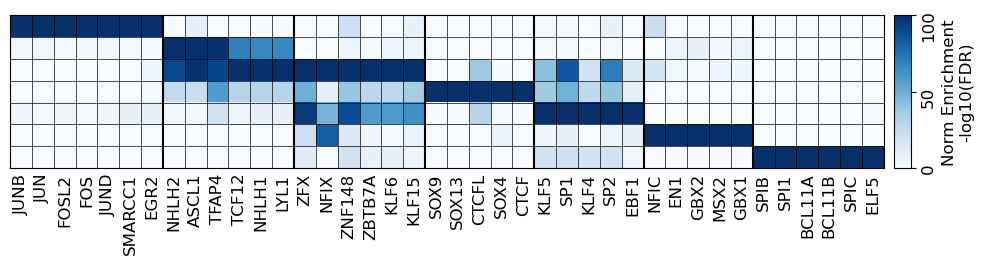

In [20]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams['font.size'] = '12'
fig, ax = plt.subplots(1,1, figsize=(10,10), sharey=True)

enrich = atac_enrich
img = ax.imshow(np.array(enrich),cmap='Blues')

x_labels = enrich.columns

ax.set_xticks(np.arange(len(enrich.columns)))
ax.set_xticklabels(x_labels,rotation=90)
ax.set_aspect(aspect=1)
ax.set_xticks(np.arange(-0.5, enrich.shape[1]-1),minor=True)
ax.set_yticks(np.arange(-0.5, enrich.shape[0]-1),minor=True)
ax.grid(which='minor', color='k', linewidth=0.5)
ax.grid(which='major',linewidth=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.yaxis.set_ticklabels([])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cb = plt.colorbar(img, cax=cax)
cb.ax.set_ylabel('Norm Enrichment\n-log10(FDR)',fontsize=12)
cb.set_ticks([0,50,100])
cb.ax.tick_params(rotation=90)

for g in [7,13,19,24,29,34]:
    ax.axvline(x=g-0.5,color='k')

celltypes = ['EXN','INH','OPC','ODC','END','ASC','MG']

fig.tight_layout()

#plt.savefig('/home/ah2428/TF_motif_heatmap.pdf',bbox_inches='tight',dpi=300)

# Figure 5c,f: EGR2 and TFAP4 footprints

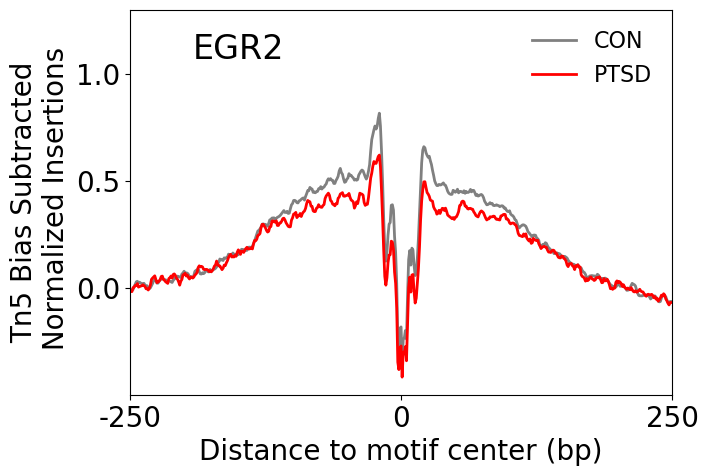

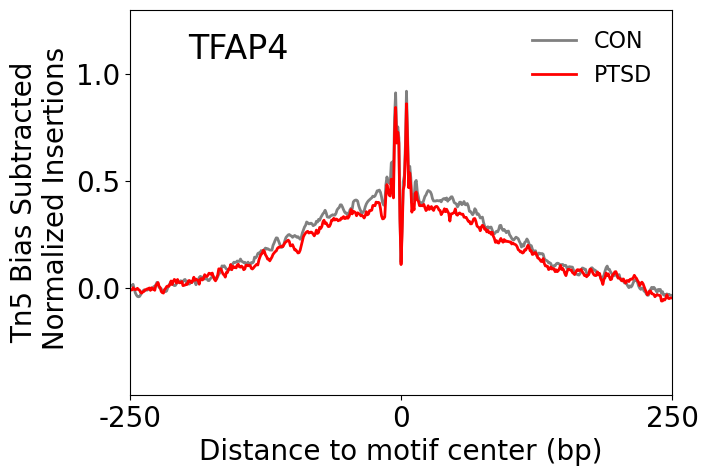

In [25]:
tfs_all = ['EGR2','TFAP4']
celltypes_all = ['EXC','INH']

for i,j in zip(tfs_all,celltypes_all):
    file = glob.glob(f'/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/ATAC/data/TF_data/{i}_*_{j}_footprint_data.txt')
    data = pd.read_csv(file[0],sep=',')
    motif_name = data.columns[1].split('.')[0]
    plot_TF_footprint(i,motif_name,j,data)

# Extended Data Figure 6e: EXN TF nDEGs similarity matrix

In [26]:
data = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/supp_tables/Supp_Table7_TF_CRE_GENE.txt',sep='\t')

In [30]:
dfs = []
for celltype in ['EXN', 'INH', 'ODC', 'OPC', 'END', 'ASC', 'MG']:
    d = data[data.Celltype==celltype]
    tfs = []
    ndegs = []
    for tf in d.TF.unique():
        tf_df = d[d.TF==tf]
        tf_df = tf_df[tf_df.DEG.isin(['UP','DOWN'])]
        ndeg = len(tf_df.geneName.unique())
        tfs.append(tf)
        ndegs.append(ndeg)
    df = pd.DataFrame(tfs,ndegs).reset_index()
    df.columns = ['n_deg',f'{celltype} TF']
    df = df[[f'{celltype} TF','n_deg']]
    df = df.sort_values('n_deg',ascending=False).reset_index(drop=True)
    dfs.append(df)
dfs = pd.concat(dfs,axis=1)

In [31]:
tf_dict = dict()

d = data[data.Celltype=='EXN']

for tf in d.TF.unique():
    tf_df = d[d.TF==tf]
    tf_df = tf_df[tf_df.DEG.isin(['UP','DOWN'])]
    deg = tf_df.geneName.unique()
    tf_dict[tf] = deg

In [32]:
tf_dict = sorted(tf_dict.items(), key=lambda x: len(x[1]), reverse=True)

In [33]:
df = pd.DataFrame(tf_dict)
df.columns = ['TF','degs']

In [34]:
arr = np.zeros((20,20))
for i in range(20):
    for j in range(20):
        n = len(list(set(df['degs'][i]) & set(df['degs'][j])))
        arr[i,j] = n

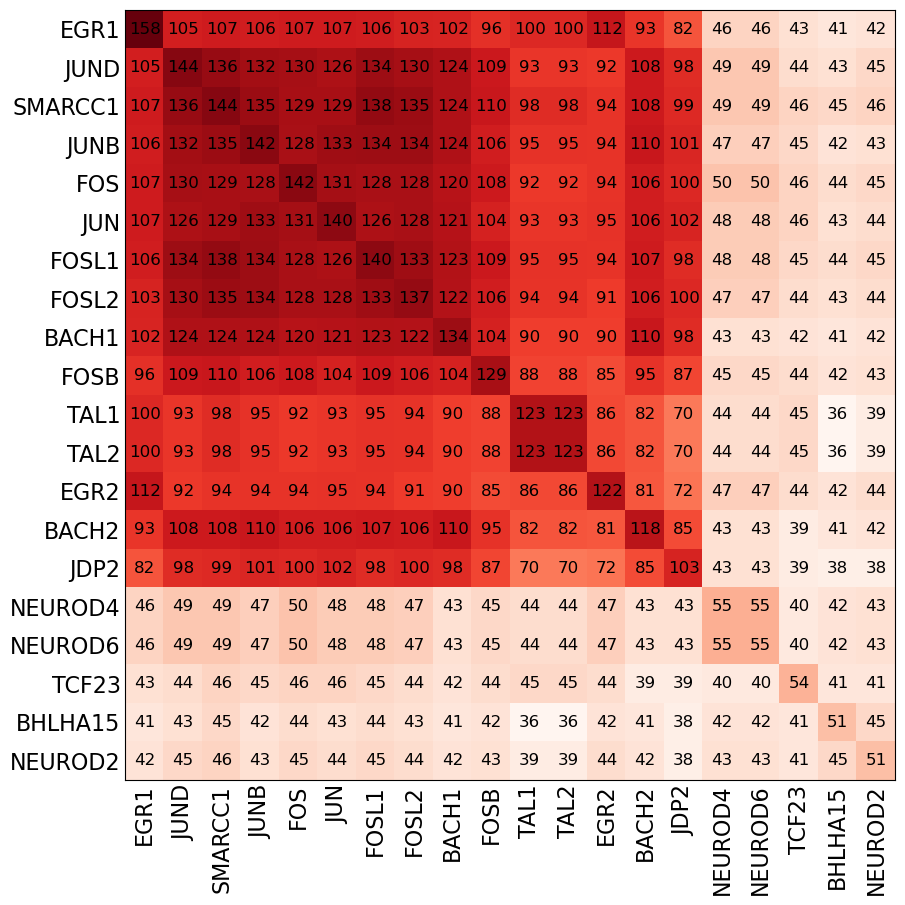

In [35]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.figure(figsize=(10,10))
plt.imshow(np.log(arr),cmap='Reds')
for i in range(20):
    for j in range(20):
        plt.text(i,j,int(arr[i,j]),ha="center", va="center",fontsize=12)
        
plt.xticks(np.arange(20),df['TF'],fontsize=16,rotation=90)
plt.yticks(np.arange(20),df['TF'],fontsize=16)

plt.tick_params(axis=u'both', which=u'both',length=0)